In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import h5py
import EWdata

In [2]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
#file_path = os.path.join(root_path, 'data_collect128', 'raw_data_dx0.1', 'rnu_312_den_1000.h5')
file_path = os.path.join(root_path, 'data_collect128', 'raw_data_dx0.1', 'rnu_312_bfield.h5')
h5file = EWdata.H5Reader(file_path)
dset = h5file.dataset_
dshape = h5file.shape_

print(h5file.attrs_)

{'col_name_0': b'MagneticField_x', 'col_name_1': b'MagneticField_y', 'col_name_2': b'MagneticField_z'}


Two ways to plot the spectrum

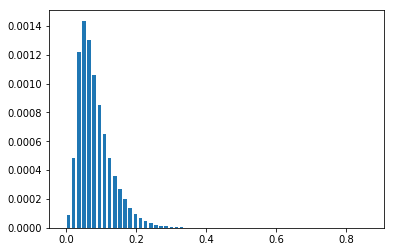

In [3]:
c1 = EWdata.constants(eta = 6.0, dx = 0.1, nSize = 320)
fourier = EWdata.FourierTransform(dset)
fourier.fft()
fourier.energy_spectrum()
seps, vals = fourier.configure_magnitude_bins(60)
s = fourier.radial_spectrum(60)
norm_factor = 1/(2.0*(c1.nSize()/c1.dx())**3) * 1/(c1.LatV()*c1.mH()**4)
# proper normalization: such that radial.sum() == total energy
s = s/(2.0*(c1.nSize()/c1.dx())**3)
# normalize to energy density in units of m_H^4
s = s / (c1.LatV()*c1.mH()**4)

plt.bar(vals, s, align='center', width = 0.01)
plt.show()

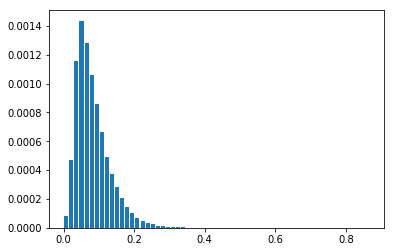

In [13]:
c1 = EWdata.constants(eta = 6.0, dx = 0.1, nSize = 320)
fourier = EWdata.FourierTransform(dset)
fourier.fft()
fourier.energy_spectrum()
k_mag = fourier.k_magnitude().flatten()
weight = fourier.kenergy_.flatten()

norm_factor = 1/(2.0*(c1.nSize()/c1.dx())**3) * 1/(c1.LatV()*c1.mH()**4)
plt.hist(k_mag, bins = 60, range = (0, 0.5 * 3**0.5), weights = weight*norm_factor, rwidth = 0.8)
plt.show()

In [14]:
h5file.close()

AttributeError: 'H5Reader' object has no attribute 'close'

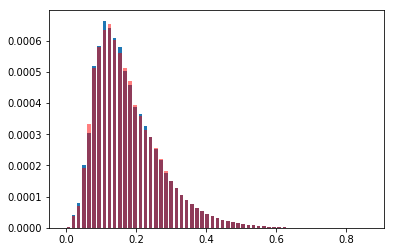

In [6]:
rbins = np.array([ 0.        ,  0.0073392 ,  0.0220176 ,  0.03669599,  0.05137439,
        0.06605279,  0.08073118,  0.09540958,  0.11008798,  0.12476637,
        0.13944477,  0.15412317,  0.16880156,  0.18347996,  0.19815836,
        0.21283675,  0.22751515,  0.24219355,  0.25687194,  0.27155034,
        0.28622874,  0.30090713,  0.31558553,  0.33026393,  0.34494232,
        0.35962072,  0.37429912,  0.38897751,  0.40365591,  0.41833431,
        0.4330127 ,  0.4476911 ,  0.4623695 ,  0.47704789,  0.49172629,
        0.50640469,  0.52108308,  0.53576148,  0.55043988,  0.56511827,
        0.57979667,  0.59447507,  0.60915346,  0.62383186,  0.63851026,
        0.65318865,  0.66786705,  0.68254545,  0.69722384,  0.71190224,
        0.72658064,  0.74125903,  0.75593743,  0.77061583,  0.78529422,
        0.79997262,  0.81465102,  0.82932941,  0.84400781,  0.85868621])
radial = np.array([  1.08310901e-10,   2.89278813e-06,   3.93708588e-05,
         7.10833090e-05,   1.92334034e-04,   3.32123981e-04,
         5.11830230e-04,   5.79478281e-04,   6.34606426e-04,
         6.53675775e-04,   6.01987344e-04,   5.61660094e-04,
         5.13344359e-04,   4.70043165e-04,   3.94223967e-04,
         3.58109386e-04,   3.15361392e-04,   2.90717926e-04,
         2.54731516e-04,   2.20407865e-04,   1.81774740e-04,
         1.51702172e-04,   1.26748718e-04,   1.05189523e-04,
         8.80790549e-05,   7.53664606e-05,   6.27031234e-05,
         5.35850470e-05,   4.47330087e-05,   3.75066342e-05,
         3.15430959e-05,   2.56997080e-05,   2.18853850e-05,
         1.80646548e-05,   1.54437214e-05,   1.27009455e-05,
         1.00748451e-05,   7.54992600e-06,   5.67709337e-06,
         4.27178452e-06,   3.09242677e-06,   2.28261384e-06,
         1.66870347e-06,   1.19595760e-06,   8.66189888e-07,
         6.31991759e-07,   4.42054216e-07,   2.99067880e-07,
         2.02614794e-07,   1.22826027e-07,   7.54310817e-08,
         4.65788459e-08,   3.00669324e-08,   1.80995542e-08,
         1.06912491e-08,   5.97603035e-09,   3.89859954e-09,
         1.40603169e-09,   5.68429186e-10,   1.10536195e-10])
fourier = EWdata.FourierTransform(dataset)
norm_factor = 1/(2.0*(nSize/dx)**3) * 1/(LatV*mH**4)
fourier.plot_energy_spectrum(60, norm_factor)
ax = plt.gca()
ax.bar(rbins, radial, align='center', width = 0.01, color = 'red', alpha = 0.5)
plt.show()

In [ ]:
# magnetic field
data_ = dset[:,:,dshape[2]/3,0] / c1.mH()**4 ### norm to units mH^4
plt.imshow(data_, interpolation = 'bilinear', vmax = 1)
plt.colorbar()
plt.xlabel('z')
plt.ylabel('y')
plt.show()

The dset is ordered as [z,y,x, component].

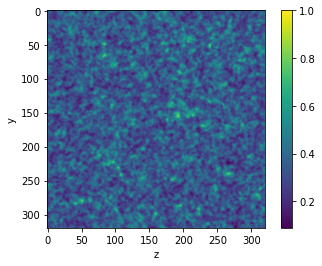

In [17]:
# total energy density
data_ = dset[:,:,dshape[2]/3,0] / c1.mH()**4 ### norm to units mH^4
plt.imshow(data_, interpolation = 'bilinear', vmax = 1)
plt.colorbar()
plt.xlabel('z')
plt.ylabel('y')
plt.show()

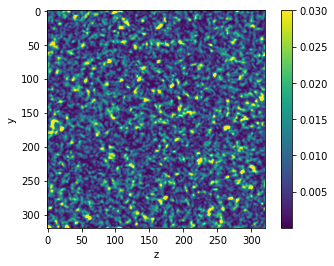

In [19]:
# magnetic energy density
data_ = dset[:,:,dshape[2]/3,1] / c1.mH()**4 ### norm to units mH^4
plt.imshow(data_, interpolation = 'bilinear', vmax = 0.03)
plt.colorbar()
plt.xlabel('z')
plt.ylabel('y')
plt.show()

Colormap lues is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

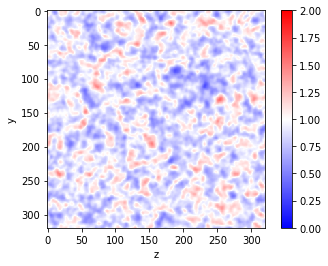

In [23]:
# Higgs magnitude squared
data_ = dset[:,:,dshape[2]/2,2] / c1.eta()**2 ### in units of eta2
plt.imshow(data_, #interpolation = 'bilinear', 
           vmin = 0, vmax = 2,
           cmap = 'bwr')
plt.colorbar()
plt.xlabel('z')
plt.ylabel('y')
plt.show()